In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold

In [2]:
tn = pd.read_csv('C:/Users/Hp/Desktop/Edwisor/Santander project/train.csv',  encoding = ' iso-8859-1')

In [3]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [4]:
tn.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
tst = pd.read_csv('C:/Users/Hp/Desktop/Edwisor/Santander project/test.csv',  encoding = ' iso-8859-1')

In [6]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [7]:
tst.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [8]:
tn.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [9]:
tst.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


# Missing Value Analysis

In [10]:
#create dataframe with missing values

miss_tn = pd.DataFrame(tn.isnull().sum())

np.transpose(miss_tn)            #for better visibility and no missing values throughout

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
miss_tn.to_csv("Miising_values.csv", index = True)

In [12]:
miss_tst = pd.DataFrame(tst.isnull().sum())

np.transpose(miss_tst)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
miss_tst.to_csv("Miising_values_test.csv", index = True)

# Outlier Analysis

In [14]:
%matplotlib inline
import seaborn as sns

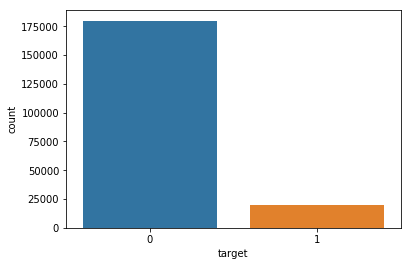

In [43]:
# to see the distribution of target variable
sns.countplot(x= 'target', data= tn)

In [16]:
cnames = tn.drop(['target', 'ID_code'], axis= 1)

In [17]:
cnames.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [18]:
for i in cnames:
    q75, q25 = np.percentile(tn.loc[:, i], [75,25])

In [19]:
iqr = q75 - q25
print (iqr)

16.045275


In [20]:
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

print (max, min)

28.9047125 -35.2763875


In [21]:
tn = tn.drop(tn [tn.loc[:, i] < min].index)

In [22]:
tn = tn.drop(tn [tn.loc[:, i] > max].index)

In [23]:
tn.shape            #which states that there were just 20 outliers

(199980, 202)

In [24]:
tn['target'].value_counts()

0    179886
1     20094
Name: target, dtype: int64

In [25]:
tn['target'].value_counts()*100/len(tn)

0    89.951995
1    10.048005
Name: target, dtype: float64

# Feature selection

In [26]:
#correlation matrix

corr=tn.iloc[:,:25].corr()

corr1=tn.iloc[:,174:].corr()

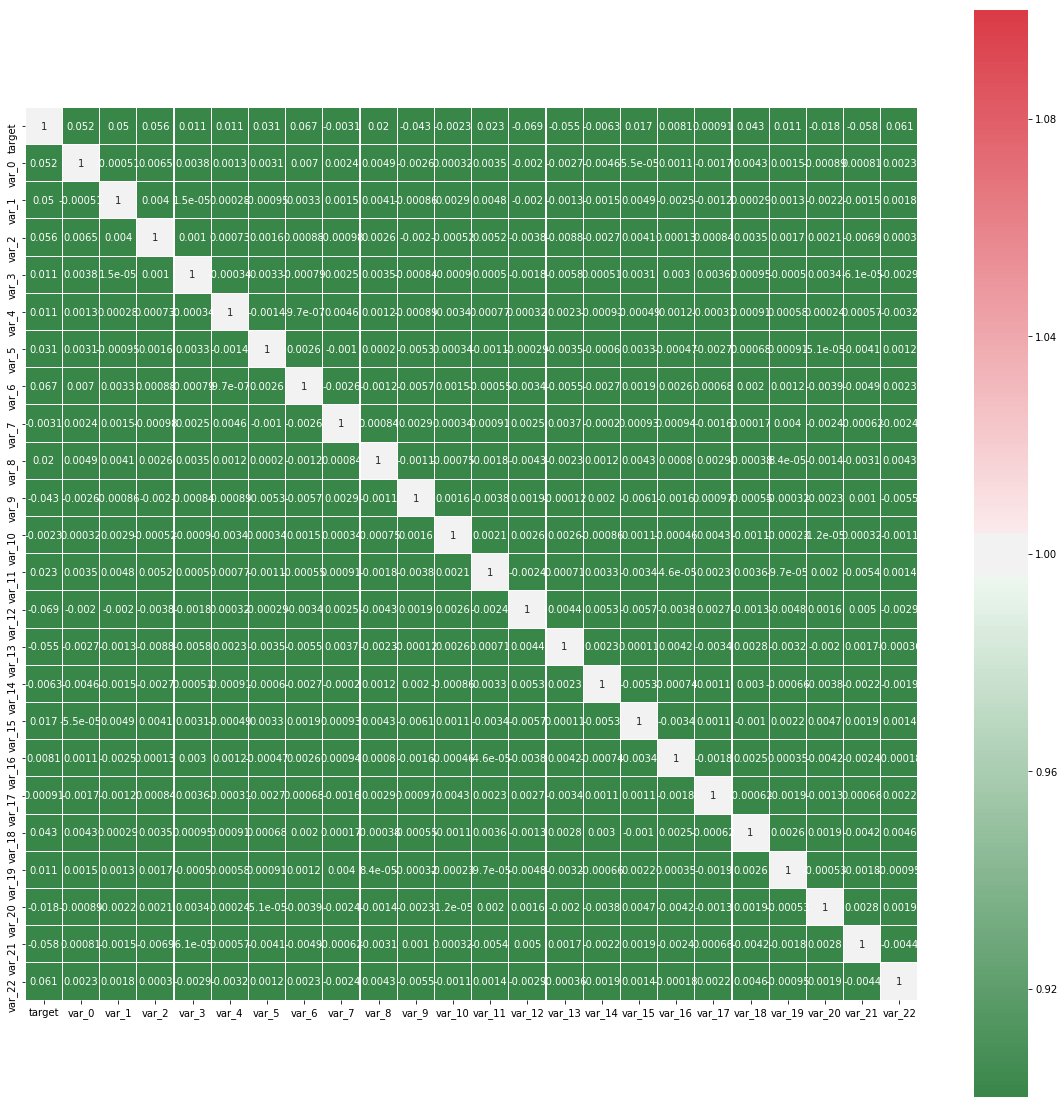

In [27]:
#Set the width and hieght of the p
fig, ax=plt.subplots(figsize=(20,20))

# plot the heatmap

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(133, 10, as_cmap=True),
            square=True, ax=ax, annot =True, vmin =1, linewidth = 0.2)

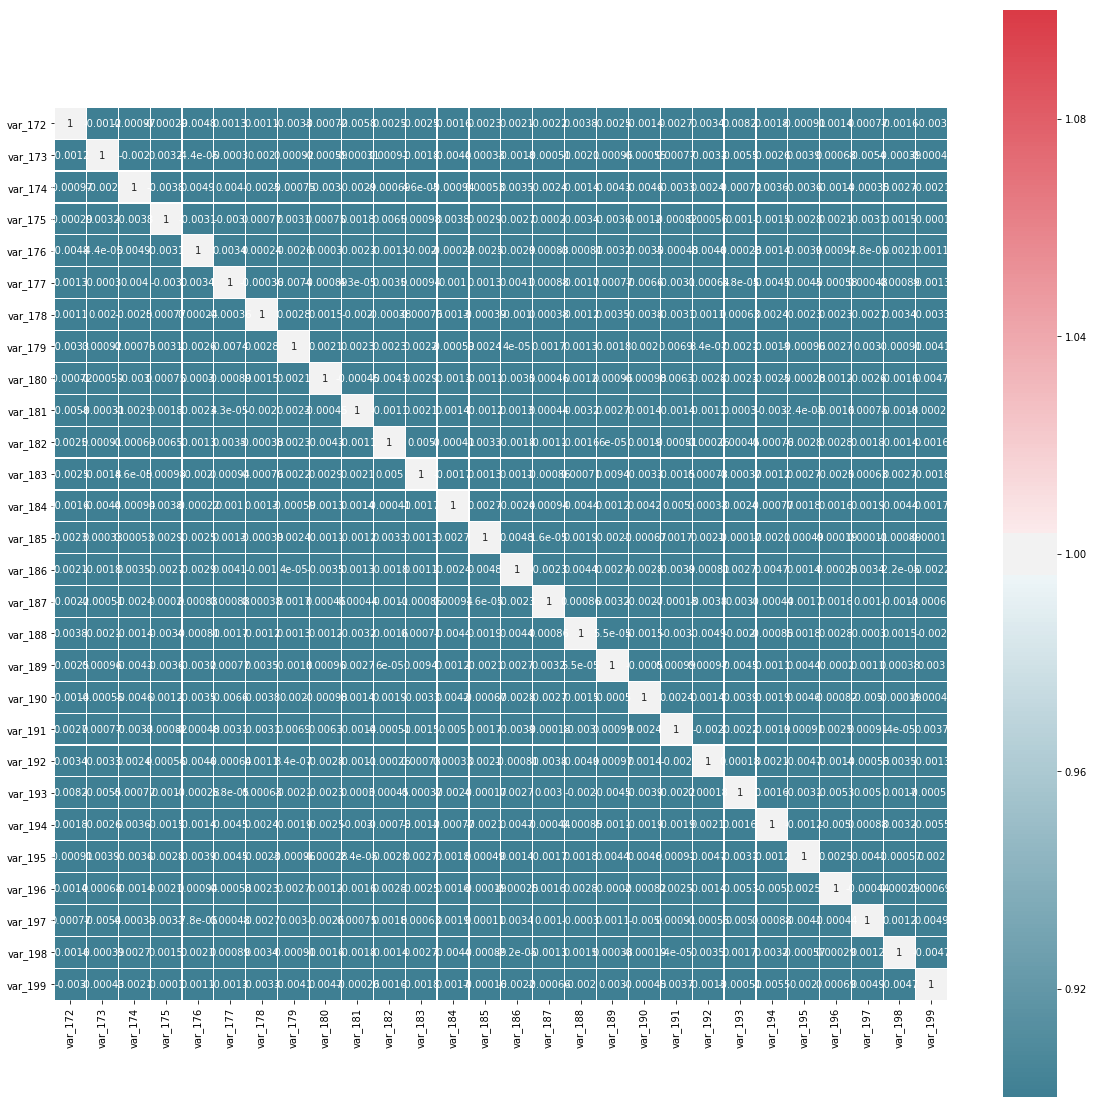

In [28]:
#Set the width and hieght of the p
fig, ax=plt.subplots(figsize=(20,20))

# plot the heatmap

sns.heatmap(corr1, mask=np.zeros_like(corr1, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot =True, vmin =1, linewidth = 0.2)

# Feature scaling

In [29]:
#import sklearn

from sklearn import preprocessing

Distributions of first 25 columns


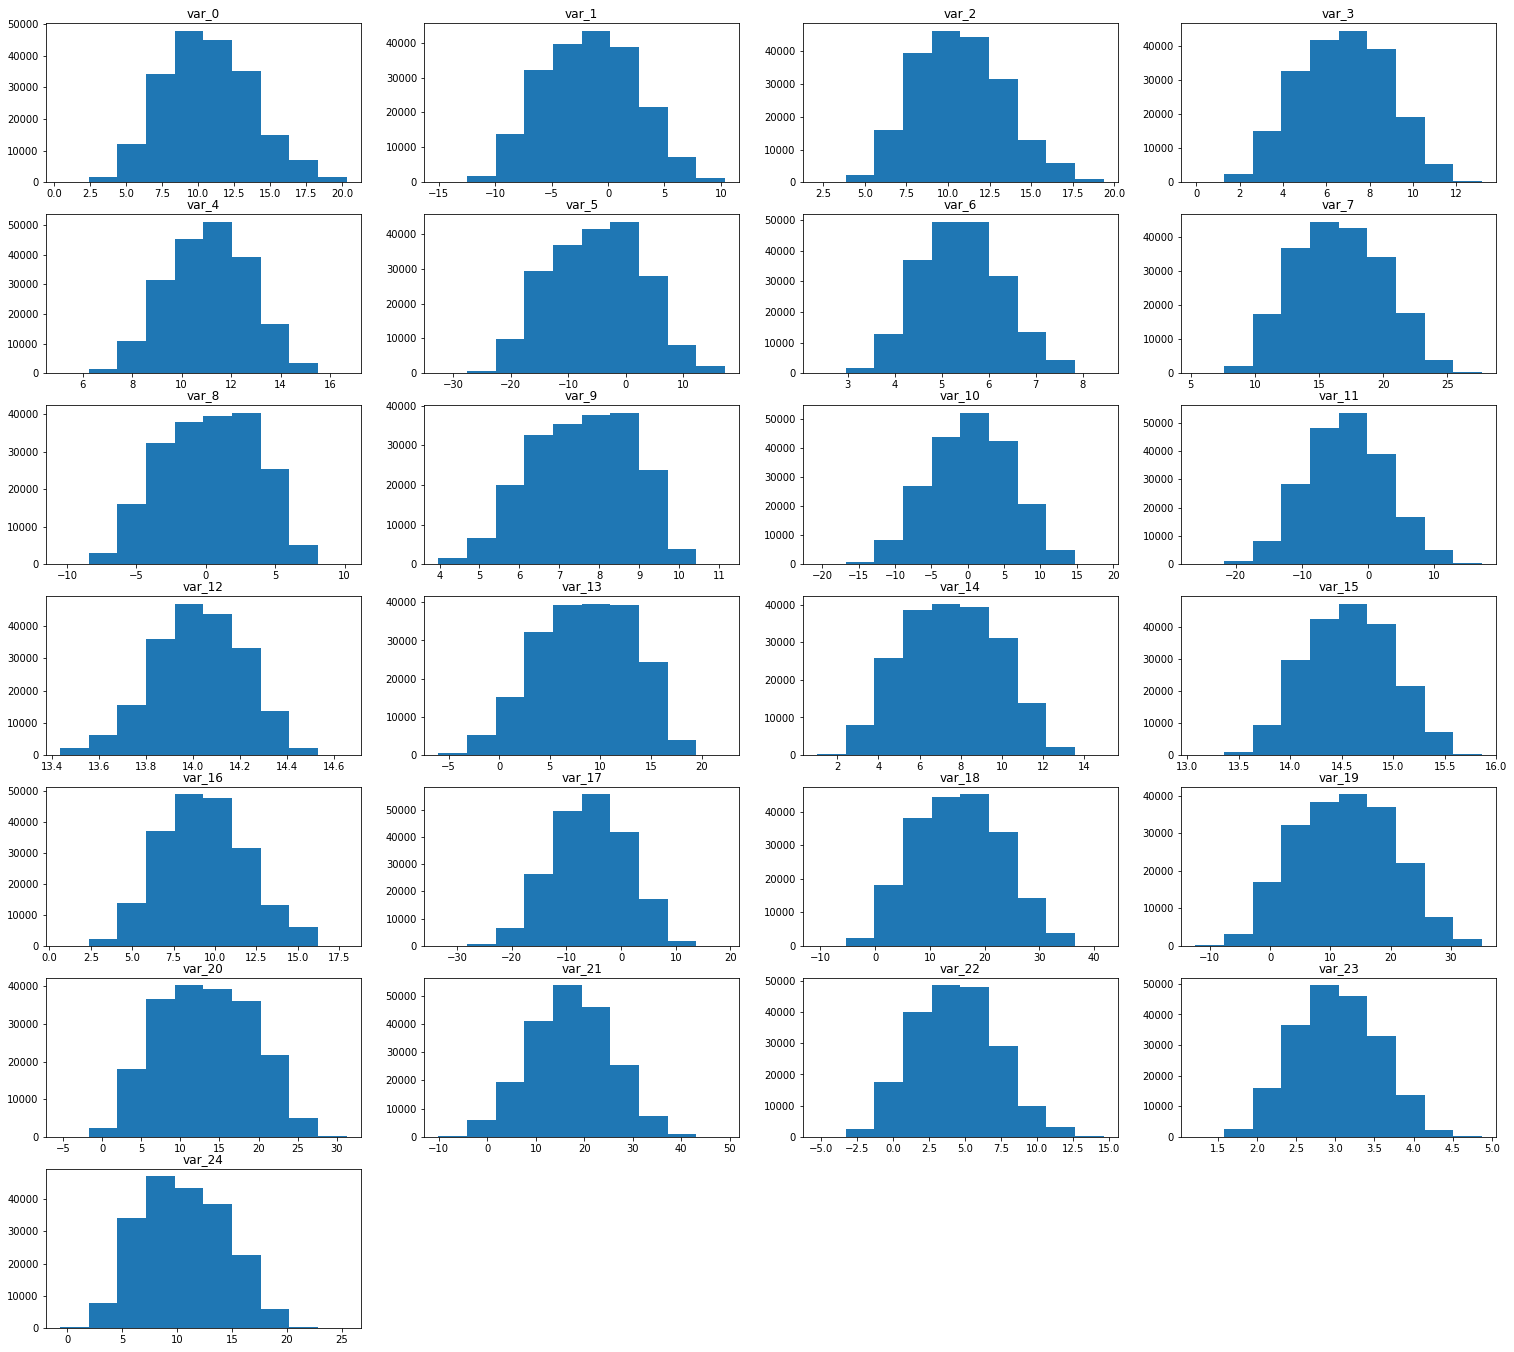

In [30]:
#let's check distribution of the data for first 25 columns

print('Distributions of first 25 columns')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(tn.columns)[2:27]):
    plt.subplot(7, 4, i + 1)
    plt.hist(tn[col])
    plt.title(col)

In [29]:
#normalizing the numerical data

#minmaxscaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [30]:
#cnames = minmaxscaler.fit_transform(cnames)
#cnames = pd.DataFrame(cnames)


In [31]:
#Nomalisation
for i in cnames:
    print(i)
    tn[i] = (tn[i] - np.min(tn[i]))/(np.max(tn[i]) - np.min(tn[i]))

var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_137
var_13

In [32]:
tn.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,0.427853,0.324824,0.568059,0.388041,0.550670,0.467321,0.454298,0.594255,...,0.569515,0.342943,0.568958,0.448173,0.510975,0.300318,0.678981,0.430958,0.327658,0.535863
1,train_1,0,0.557212,0.428639,0.681235,0.410417,0.628408,0.795072,0.536604,0.500584,...,0.668079,0.536531,0.523717,0.756190,0.350211,0.765154,0.686614,0.468277,0.609546,0.583594
2,train_2,0,0.411969,0.483777,0.578061,0.599690,0.474941,0.471329,0.753295,0.414724,...,0.522496,0.643141,0.448960,0.448000,0.671183,0.881350,0.236337,0.381950,0.425833,0.559200
3,train_3,0,0.535099,0.507140,0.396562,0.546993,0.647586,0.616822,0.572995,0.428577,...,0.570474,0.383085,0.370986,0.439205,0.745555,0.418549,0.346810,0.717176,0.590016,0.411826
4,train_4,0,0.473637,0.533434,0.624133,0.504796,0.621079,0.702836,0.589011,0.622220,...,0.387371,0.629275,0.299888,0.697737,0.238801,0.393218,0.557507,0.586526,0.591416,0.414794


# Model Development

In [33]:
#import libraries

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
minority_class_len = len(tn[tn['target']== 1])

print(minority_class_len)

20094


In [45]:
majority_class_indices = tn[tn['target']==0].index

print(majority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            199989, 199991, 199992, 199993, 199994, 199995, 199996, 199997,
            199998, 199999],
           dtype='int64', length=179886)


In [46]:
random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace = False)

print(random_majority_indices)

[127875 153047 142298 ... 197756 110209 123602]


In [47]:
minority_class_indices = tn[tn['target']==1].index
print(minority_class_indices)

Int64Index([    13,     29,     63,     65,     71,     72,     84,     99,
               119,    120,
            ...
            199877, 199892, 199897, 199923, 199953, 199966, 199976, 199981,
            199986, 199990],
           dtype='int64', length=20094)


In [48]:
under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

In [49]:
tn = tn.loc[under_sample_indices]

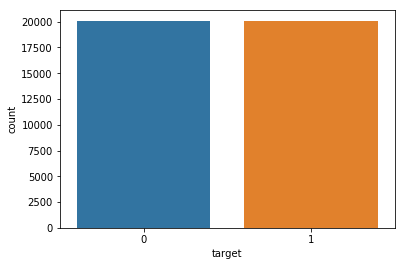

In [50]:
sns.countplot(x= 'target', data= tn)

In [51]:
#replace target variables values with yes or no

tn['target'] = tn['target'].replace(0, 'No')
tn['target'] = tn['target'].replace(1, 'Yes')

In [52]:
tn.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
174995,train_174995,No,0.451046,0.270273,0.465737,0.394565,0.549299,0.544399,0.517671,0.410306,...,0.531929,0.532435,0.663335,0.471615,0.811364,0.442788,0.580269,0.140236,0.416996,0.402543
96880,train_96880,No,0.869275,0.316091,0.701385,0.387013,0.717779,0.506845,0.520113,0.611643,...,0.403065,0.378005,0.375030,0.634677,0.634785,0.593199,0.288865,0.545283,0.346940,0.808315
197756,train_197756,No,0.469417,0.540940,0.769812,0.568409,0.565976,0.472560,0.518507,0.608430,...,0.444126,0.277821,0.625944,0.427238,0.285348,0.533601,0.328243,0.550697,0.345661,0.369505
110209,train_110209,No,0.374192,0.477494,0.291386,0.297895,0.665799,0.465237,0.476641,0.278045,...,0.569994,0.486501,0.529701,0.632050,0.582592,0.283735,0.494152,0.417431,0.451526,0.558589
123602,train_123602,No,0.400832,0.295246,0.408084,0.484378,0.487643,0.530409,0.426628,0.437501,...,0.683847,0.483172,0.416456,0.384045,0.518893,0.521151,0.621184,0.259826,0.822329,0.612083


In [53]:
#divide the dataset in test and train data

X = tn.drop(['ID_code', 'target'], axis=1)
Y = tn['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [105]:
#decision tree

from sklearn import tree

C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#test scores

C50_predictions = C50_model.predict(X_test)

In [106]:
#confusion matrix

CM = pd.crosstab(y_test, C50_predictions)

#let check for belw values
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [107]:
CM

col_0,No,Yes
target,,
No,3510,2501
Yes,2547,3499


In [108]:
((TP+TN)*100)/(TP+TN+FP+FN)

58.132205357883386

In [109]:
#False Negative rate 
(FN*100)/(FN+TP)

42.12702613298048

In [110]:
#recall 
print('Recall: ', TP/(TP+FN))

#precision
print('Precision:', TP/(TP+FP) )

Recall:  0.5787297386701952
Precision: 0.5831666666666667


In [111]:
# random forest

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 500).fit(X_train, y_train)

In [112]:
Prediction = RF.predict(X_test)

In [113]:
CM = pd.crosstab(y_test, Prediction)

TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

CM

col_0,No,Yes
target,,
No,4525,1486
Yes,1263,4783


In [114]:
print('Accuracy: ', ((TP+TN)*100)/(TP+TN+FP+FN))
print('FNR:', (FN*100)/(FN+TP))

Accuracy:  77.19996682425148
FNR: 20.88984452530599


In [115]:
#recall 
print('Recall: ', TP/(TP+FN))

#precision
print('Precision:', TP/(TP+FP))

Recall:  0.7911015547469401
Precision: 0.7629605997766788


In [116]:
#with n= 100
#Accuracy = 74.38
#FNR = 25.32

#with n= 500
#Accuracy = 77.15
#FNR = 20.75
#recall= 79.11
#precision= 76.2

In [117]:
from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(y_test, Prediction)*100)

Accuracy: 77.19996682425148


In [118]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

In [119]:
Predict = KNN.predict(X_test)

In [120]:
CM = pd.crosstab(y_test, Predict)

CM

col_0,No,Yes
target,,
No,5727,284
Yes,5202,844


In [121]:
#let us save TP, TN, FP, FN

TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model

((TP+TN)*100)/(TP+TN+FP+FN)

54.499460894086425

In [122]:
#False Negative rate 
(FN*100)/(FN+TP)

86.040357260999

In [123]:
#Accuracy= 54.49
#FNR= 86.04

In [124]:
#recall 
print('Recall: ', TP/(TP+FN))

#precision
print('Precision:', TP/(TP+FP) )

Recall:  0.13959642739000994
Precision: 0.74822695035461


In [125]:
# logistic regression

from sklearn.linear_model import LogisticRegression

#instantiate the model

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
Pred = logreg.predict(X_test)

In [127]:
CM = pd.crosstab(y_test, Pred)


#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy

((TP+TN)*100)/(TP+TN+FP+FN)


77.49025462386994

In [128]:
#False negative

(FN*100)/(FN+TP)

22.990406880582203

In [92]:
#Accuracy =77.5
#FNR= 23

In [129]:
#recall 
print('Recall: ', TP/(TP+FN))

#precision
print('Precision:', TP/(TP+FP) )

Recall:  0.770095931194178
Precision: 0.7785953177257525


In [130]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

#implementation

Navbay = GaussianNB().fit(X_train, y_train)

In [131]:
PredictNB = Navbay.predict(X_test)

In [132]:
CM = pd.crosstab(y_test, PredictNB)


#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy

((TP+TN)*100)/(TP+TN+FP+FN)

80.25213568881148

In [133]:
#False negative

(FN*100)/(FN+TP)

20.228250082699304

In [97]:
#Accuracy= 80.25
#FNR= 20.22

In [134]:
#recall 
print('Recall: ', TP/(TP+FN))

#precision
print('Precision:', TP/(TP+FP) )

Recall:  0.7977174991730069
Precision: 0.8063868918241097


In [135]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss= 'modified_huber', shuffle= True, random_state= 101)

In [136]:
sgd.fit(X_train, y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
       max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l2', power_t=0.5, random_state=101, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [137]:
PredictSGD = sgd.predict(X_test)

In [138]:
CM = pd.crosstab(y_test, PredictSGD)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy

((TP+TN)*100)/(TP+TN+FP+FN)

73.44281330347516

In [139]:
#False negative

(FN*100)/(FN+TP)

12.206417466093285

In [103]:
#Accuracy = 73.44
#FNR= 12.20

In [140]:
#recall 
print('Recall: ', TP/(TP+FN))

#precision
print('Precision:', TP/(TP+FP) )

Recall:  0.8779358253390671
Precision: 0.6829644879053011
